In [1]:

# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
     

In [2]:
# Set up the directories for train and test data
training_directory_path = r"C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset/Train"
testing_directory_path =r"C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset/Test"

In [3]:

#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=training_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=testing_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78202 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [4]:

# Check the datatype of training dataset
training_dataset
     

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 46), dtype=tf.float32, name=None))>

In [5]:

for images , labels in training_dataset.take(1):
  print(images.shape)
  print(labels.shape)
     

(32, 32, 32, 3)
(32, 46)


In [6]:

for images , labels in training_dataset.take(1):
  print(f"Image tensor :\n {images[0]}")
  print(f"Label tensor :\n {labels[0]}")

Image tensor :
 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Label tensor :
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह क्ष ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()                                                                                                        

In [8]:
class_names_=training_dataset.class_names    # get the class names according to our training dataset 
     

In [9]:

print(class_names_)   # Display the class names

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [10]:

# Sort the hindi character names according to training dataset
hindi_character_=[]
for char in class_names_[:-10]:
  position = int(char.split("_")[1])
  hindi_character_.append(hindi_character[position-1])

hindi_character_.extend(hindi_character[-10:])
     

In [11]:

print(hindi_character_)  # Display Hindi character according to training dataset

['ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'क', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'ख', 'श', 'ष', 'स', 'ह', 'क्ष', 'ॠ', 'त्र', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [12]:
# Download Hindi Fonts to display is matplotlib plots
def get_hindi_fonts():
#
  if not os.path.exists("./hindi-font/Nirmala.ttf"):
    print("Downloading Hindi fonts...")
    print("Downloading the Nirmala.tff ...")
    !wget https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
    !unzip -q nirmala-ui.zip

  else:   
    print("Nirmala.ttf already exist. Skipping downloading...")

get_hindi_fonts()

Nirmala.ttf already exist. Skipping downloading...


In [13]:
# This function will take one batch and display all of the images and labels that are associated with that batch.
def display_images_from_dataset(data , subplots = (8,4) , figsize = (12,20) , fontsize = 20):
  '''
  data : From where the images to be displayed
  subplot : No of plot to be displayed (Default : subplot = (8,4) )
  figsize : Size of figure (Default : (12,20) )
  fontsize : Size of text (Default : fontsize = 20 )
  '''

  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('./hindi-font/Nirmala.ttf'))  # Helpful in displaying Hindi character in matplotlib

  plt.figure(figsize=figsize)
  for images , labels in data.take(1):
    for i in range(subplots[0]*subplots[1]):
      plt.subplot(subplots[0],subplots[1],i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(hindi_character_[tf.argmax(labels[i]).numpy()],fontproperties=hindi_font,fontsize=fontsize)  # We are taking argmax of labels as labels are One-Hot encoded
      plt.axis(False)
  
  plt.show()


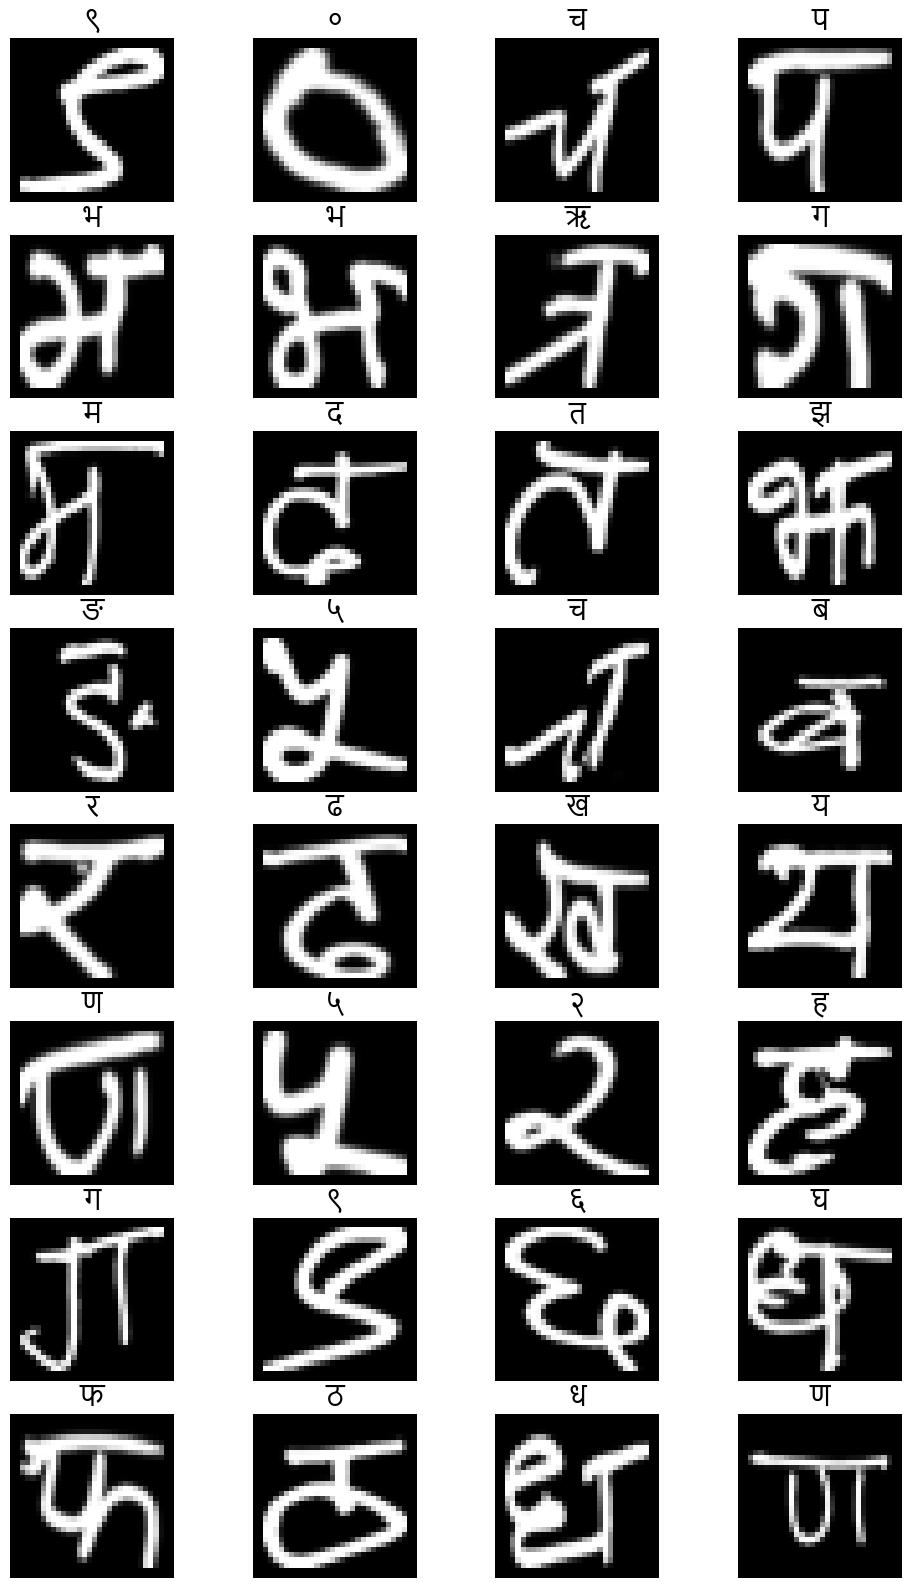

In [14]:

display_images_from_dataset(training_dataset)

# Split training data in train and validation

In [15]:

# Data will be partitioned into training and validation sets by this function.
def train_validation_split(data,val_size=0.15):
  '''
  Parameters :
  -----------------------
  data : data to be split into train and validation
  val_size : Percentage of data to be in validation and rest in training (Default : 15 % data in validation and 85 % in training)

  Return :
  ----------------------
  Return train and validation dataset
  '''

  training_size = len(data)

  training_data = data.take(int((1-val_size)*training_size))   # 85 % data in training
  validation_data = data.skip(int((1-val_size)*training_size)) # 15 % data in validation

  return training_data , validation_data

In [16]:

# Spliting the training dataset into train and validation data
training_data , validation_data = train_validation_split(training_dataset) 

In [17]:

training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testting_dataset = testting_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# ResNet + BatchNormalization Dropout

In [18]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_6/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path6 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"ResNet_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path6,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [19]:
rescale = tf.keras.Sequential([  # Data Normalization
  layers.Rescaling(1./255),
])

input = layers.Input(shape=(32,32,3))  # Input to the model
x = rescale(input)                     # Rescaling the input

# Layer 1 + BatchNormalization
x = layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.BatchNormalization()(x)
output_1 = layers.MaxPooling2D(pool_size=(2,2))(x)

# Layer 2 + BatchNormalization
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_1)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
x = layers.BatchNormalization()(x)
# Skip Connection
output_2 = layers.add([x,output_1])

# Layer 3 + BatchNormalization
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_2)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
x = layers.BatchNormalization()(x)
# Skip Connection
output_3 = layers.add([x,output_2])

x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(output_3)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)

# Fully connected layer 1
output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_6 = tf.keras.Model(input , output)

In [20]:
# Compile the model
model_6.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [21]:
# Fit the model
model_6_history = model_6.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])      # 13m : 4s       
     

Epoch 1/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 467s 220ms/step - accuracy: 0.6108 - loss: 1.4208 - val_accuracy: 0.9391 - val_loss: 0.1860 - learning_rate: 0.0010
Epoch 2/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2077/2077 ━━━━━━━━━━━━━━━━━━━━ 295s 142ms/step - accuracy: 0.9556 - loss: 0.1536 - val_accuracy: 0.9771 - val_loss: 0.0836 - learning_rate: 0.0010
Epoch 4/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 288s 138ms/step - accuracy: 0.9716 - loss: 0.0997 - val_accuracy: 0.9793 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 6/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 276s 133ms/step - accuracy: 0.9789 - loss: 0.0723 - val_accuracy: 0.9832 - val_loss: 0.0588 - learning_rate: 0.0010
Epoch 8/50
2077/2077 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/50
2077/2077 ━━━

In [24]:
model_6_results= model_6.evaluate(testting_dataset)
model_6_results

432/432 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9943 - loss: 0.0262


[0.020185526460409164, 0.9950724840164185]

In [25]:
predicted_probability = model_6.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

432/432 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step


In [27]:
y_true= []
for images, labels in testting_dataset.unbatch():
    y_true.append(labels.numpy().argmax())

In [28]:
accuracy_score(y_true,predicted_class)

0.995072463768116

In [29]:
# This function will show the model's loss and accuracy plot.
def display_loss_accuracy_curves(model_history):
  """
  Return the loss and accuracy plot
  
  """

  train_loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  train_acc = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  epochs=range(len(model_history.history['loss']))

  # Plot loss curve
  plt.figure(figsize=(7,7))
  plt.plot(epochs , train_loss , label = "Training loss")
  plt.plot(epochs , val_loss , label = "Validation loss")
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='upper right')

  # Plot Accuracy curve
  plt.figure(figsize=(7,7))
  plt.plot(epochs , train_acc , label = "Training accuracy")
  plt.plot(epochs , val_acc , label = "Validation accuracy")
  plt.title("Accuracy curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='lower right')

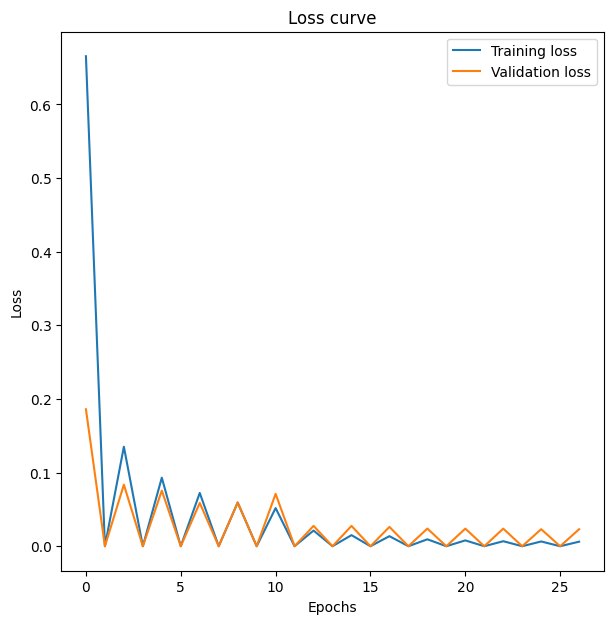

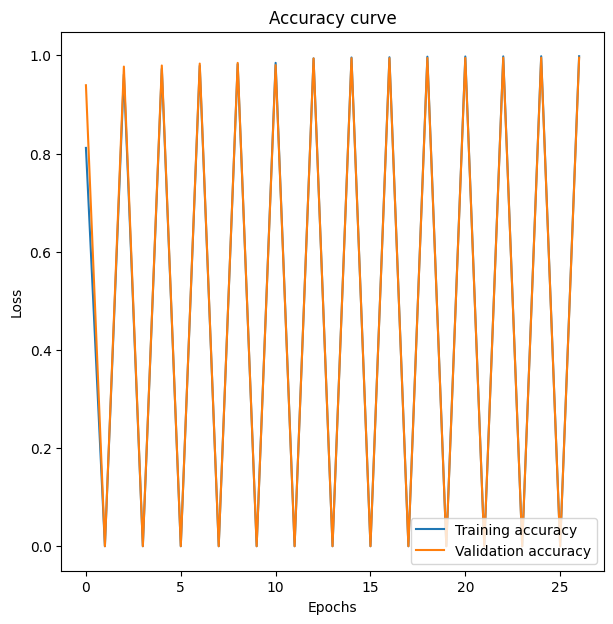

In [30]:
# Display loss and accuracy curves for model 6
display_loss_accuracy_curves(model_6_history)

#  Error Analysis

In [32]:

# Get the image path for all of our test data.

test_set = image_dataset_from_directory(directory=testing_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

image_paths=[] # Store the image path

for img_path in test_set.list_files("./DevanagariHandwrittenCharacterDataset/Test/*/*.png",shuffle=False):
  image_paths.append(img_path.numpy())

image_paths[:10] # Display first 10 image path


Found 13800 files belonging to 46 classes.


[b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\10544.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\10551.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\121.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\125.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\135.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\13642.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\13656.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\13657.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\13674.png',
 b'.\\DevanagariHandwrittenCharacterDataset\\Test\\character_10_yna\\13680.png']

In [39]:


# Lets view top 20 wrong prediction
def display_wrong_prediction(data , subplots = (5,4) , figsize = (10,10) , fontsize = 20):
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('hindi-font/Nirmala.ttf')) 

  plt.figure(figsize=figsize)
  k=1
  for row in data.itertuples():

    plt.subplot(subplots[0],subplots[1],k)
    k=k+1
    img = tf.io.read_file(row[1])
    img = tf.io.decode_image(img)

    plt.imshow(tf.squeeze(img).numpy().astype('uint8'),cmap='gray')
    plt.title(f"Actual Class : {row[5]}\nPredicted Class : {row[6]}\nConfidence : {row[4]*100:.2f}",fontproperties=hindi_font,fontsize=fontsize,color='red')
    plt.axis(False)
  
  plt.show()

432/432 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step
We have only 71 images that did not match our predictions, out of a total of 13800 images 
Among those 71 images some of them are displayed below




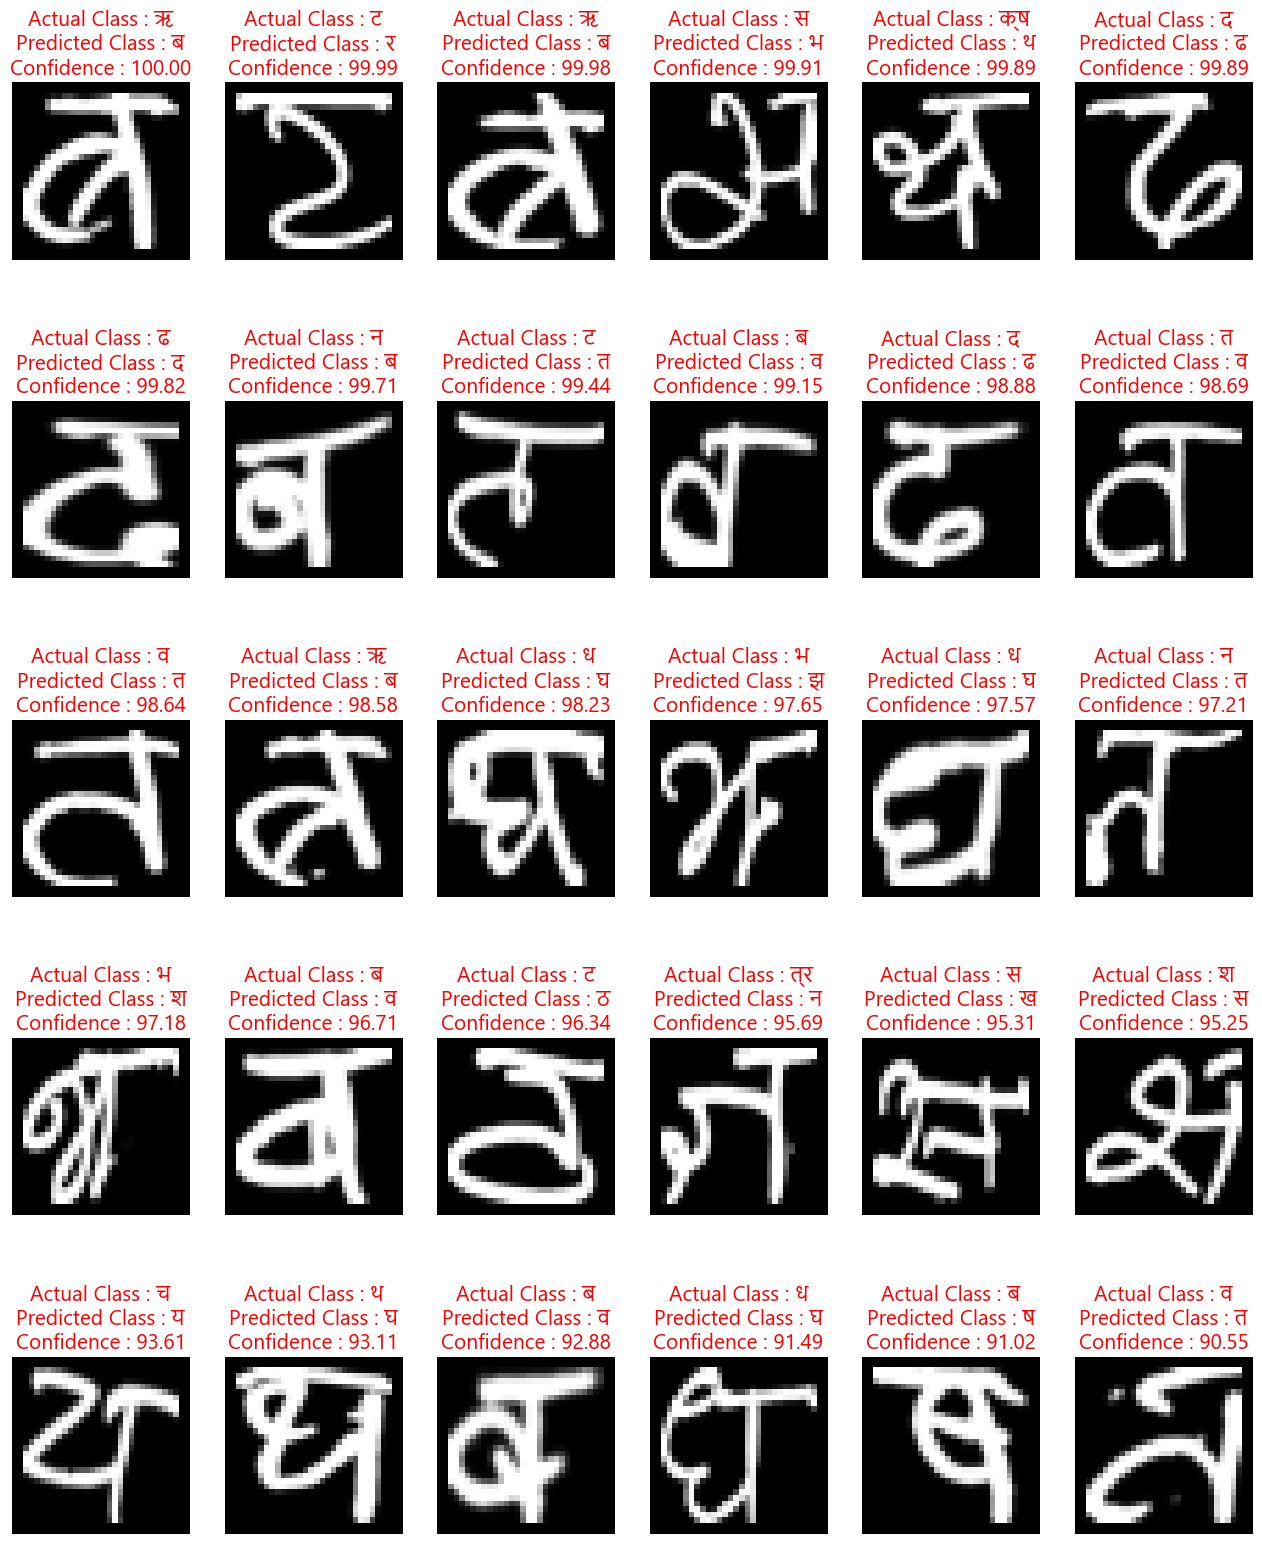

In [40]:

model_6.load_weights(checkpoint_path6)  # Load the model 6

predicted_probability = model_6.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

In [41]:

# Get dataframe having wrong predictions and sort the dataframe in ascending order by predictions confidence
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
wrong_df.head()

,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
8119,b'.\\DevanagariHandwrittenCharacterDataset\\Te...,27,14,0.999967,ॠ,ब
495,b'.\\DevanagariHandwrittenCharacterDataset\\Te...,1,18,0.999941,ट,र
8121,b'.\\DevanagariHandwrittenCharacterDataset\\Te...,27,14,0.999841,ॠ,ब
7315,b'.\\DevanagariHandwrittenCharacterDataset\\Te...,24,15,0.999094,स,भ
7960,b'.\\DevanagariHandwrittenCharacterDataset\\Te...,26,7,0.998937,क्ष,थ


In [42]:
model_6.load_weights(checkpoint_path6)

# Save model

In [43]:
from tensorflow.keras.models import load_model

In [59]:
model_6.save(r'C:\Users\DELL\jupyterr\TrainedModel\model_6.keras')

In [60]:
loaded_model_1=tf.keras.models.load_model(r'C:\Users\DELL\jupyterr\TrainedModel\model_6.keras')

In [ ]:
predicted_probability=loaded_model_1.predict(training_dataset,verbose=1)
predicted_class=predicted_probability.argmax(axis=1)
accuracy_score(y_true,predicted_class)